<a href="https://colab.research.google.com/github/yudisdc1/Portofolio/blob/main/Data%20Exploration%20and%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama anggota kelompok :
1. Faza Muthmainnah                 (2006523672)
2. Inez Aurellia Rosyana            (2006571204)
3. Jonathan Hadi Prasetyanto        (2006529096)
4. Reynee Joyvina Freeina Anthonia  (2006485024)
5. Yudistira Dwi Cahya              (2006530942)



# Latihan Studi Kasus: Data Tips Restaurant

Sebuah dataset dari suatu Restaurant memuat variabel-variabel berikut:
*	total_bill: Total bill (cost of the meal), including tax, in US dollars
*	tip: Tip (gratuity) in US dollars
*	sex: Sex of person paying for the meal (0=male, 1=female)
*	smoker: Smoker in party? (0=No, 1=Yes)
*	day: 3=Thur, 4=Fri, 5=Sat, 6=Sun
*	time: 0=Day, 1=Night
*	size: Size of the party

https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

# Latihan:

## Silahkan Latihan untuk menjawab pertanyaan-pertanyaan berikut:

1. Adakah tipe variabel yang kurang tepat di data tersebut?
2. Apakah data numeriknya cenderung berdistribusi normal?
3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?
4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?
5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?
6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?
7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?
8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?
9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)
9. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant?

* Skills/kompetensi apa yang terasa sangat diperlukan dari latihan ini?

# Modul

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [ ]:
try:
    # Running Locally
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

--2021-04-12 17:04:34--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv’

price.csv           100%[===================>]  52.34K  --.-KB/s    in 0.01s   

2021-04-12 17:04:34 (4.36 MB/s) - ‘data/price.csv’ saved [53592/53592]



In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [ ]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally
    price = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

In [ ]:
# Dari EDA-01 - Bisa juga Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
price2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dist_Taxi,918,NaN,NaN,NaN,8216.19,2530.25,146,6475.5,8229,9934.25,16850
Dist_Market,918,NaN,NaN,NaN,11007.9,2524.09,1666,9349.25,11155,12663.5,18281
Dist_Hospital,930,NaN,NaN,NaN,13061.1,2566,3227,11301.2,13154.5,14787.8,22407
Carpet,923,NaN,NaN,NaN,1487.17,249.94,775,1318,1480,1654,2229
Builtup,916,NaN,NaN,NaN,1782.99,297.634,932,1583,1774,1982,2667
Parking,931,4,Open,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Category,931,3,CAT B,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rainfall,931,NaN,NaN,NaN,785.209,265.449,-110,600,780,965,1560
House_Price,931,NaN,NaN,NaN,5.93011e+06,1.72828e+06,30000,4.658e+06,5.866e+06,7.1805e+06,1.1632e+07


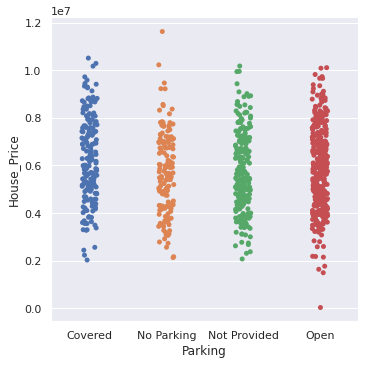

In [ ]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
# Apa yang bisa dilihat dari hasil ini?

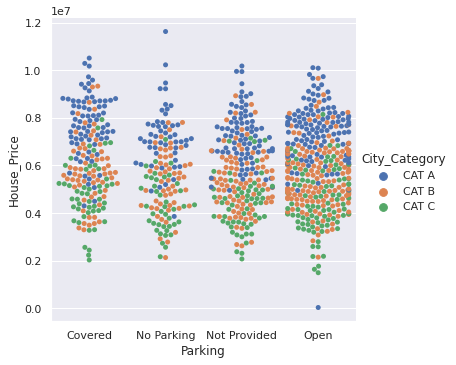

In [ ]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="swarm", data=price2)

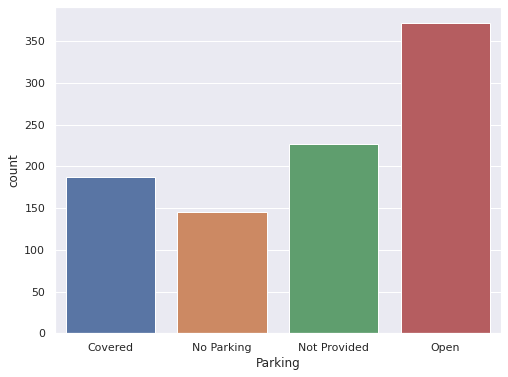

In [ ]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="Parking", data=price2)

In [ ]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2),
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

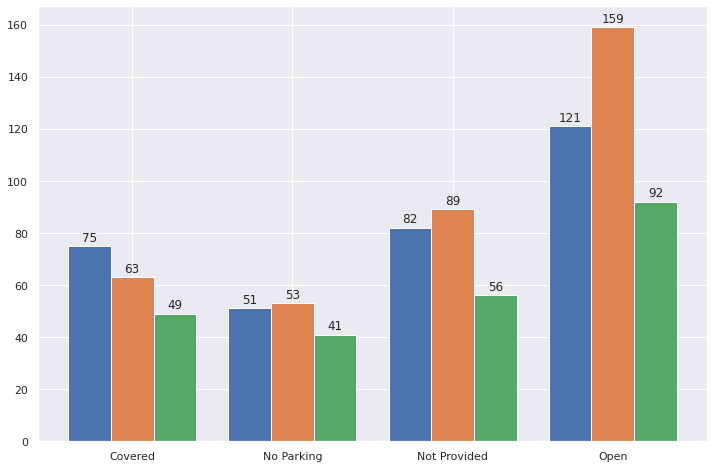

In [ ]:
counts = price2.groupby(["Parking", "City_Category"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

In [ ]:
price2.groupby(["Parking", "City_Category"]).size().unstack()

City_Category,CAT A,CAT B,CAT C
Parking,,,
Covered,75,63,49
No Parking,51,53,41
Not Provided,82,89,56
Open,121,159,92


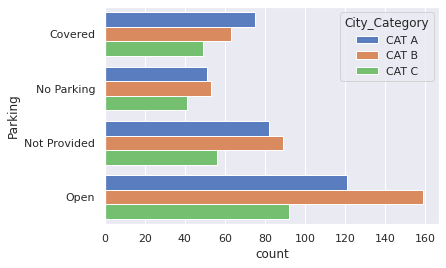

In [ ]:
ax = sns.countplot(y = 'Parking', hue = 'City_Category', palette = 'muted', data=price2)

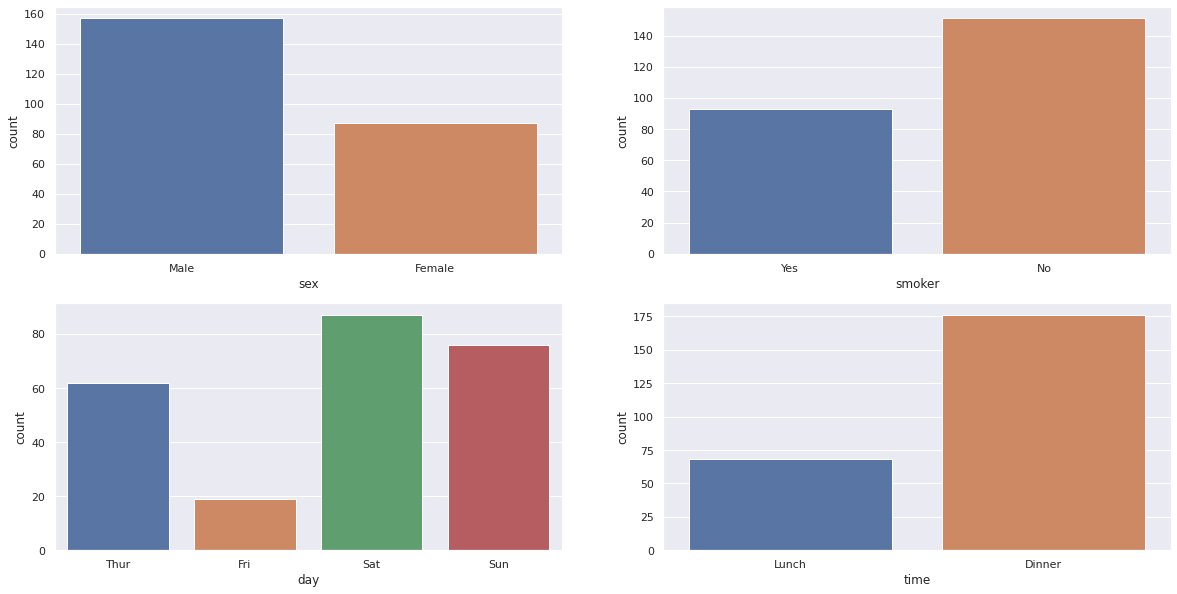

In [ ]:
tips=sns.load_dataset('tips')
categorical = tips.select_dtypes(include = ['category']).columns
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(tips[variable], ax=subplot)

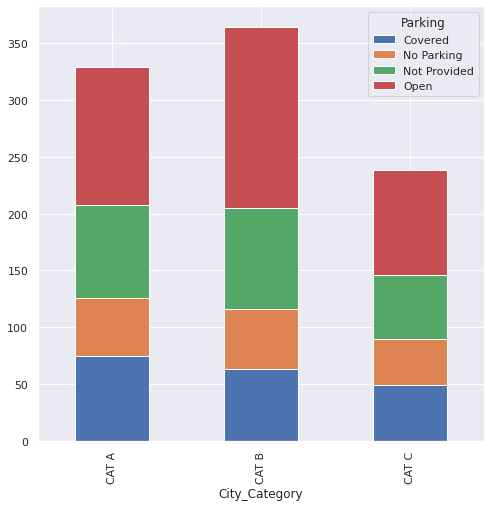

In [ ]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

In [ ]:
# ini dilakukan jika kita ingin menyimpan plotnya ke dalam suatu file
p.figure.savefig('barChart.png')
# lihat di folder ipynb-nya akan muncul file baru.

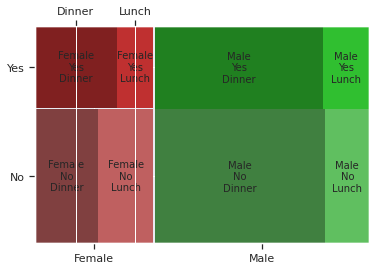

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

p = mosaic(tips, ['sex','smoker','time'])

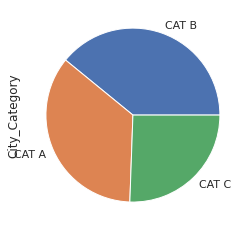

In [ ]:
# PieChart
plot = price2.City_Category.value_counts().plot(kind='pie')

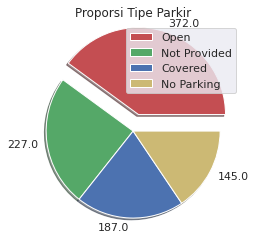

In [ ]:
data = price2['Parking']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.2, 0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Tipe Parkir')
plt.legend(labels,loc='best')
plt.show()

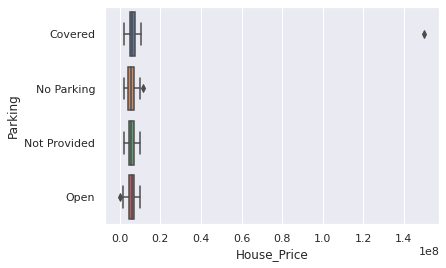

In [ ]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
p = sns.boxplot(x="House_Price", y="Parking", data=price)

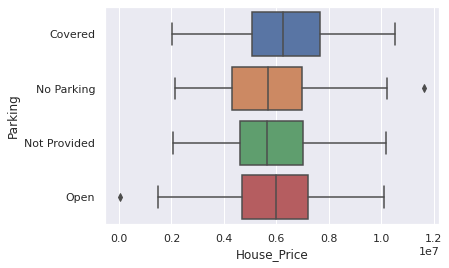

In [ ]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)
# Apa makna pola yang terlihat di data oleh BoxPlot ini?

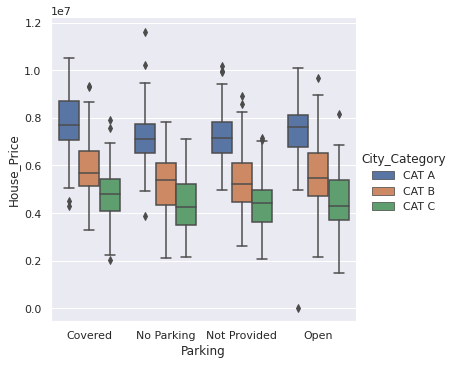

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

* Ada dugaan/interpretasi (baru) apakah dari boxPlot diatas?
* Sebutkan beberapa kelemahan (PitFalls) Box Plot?

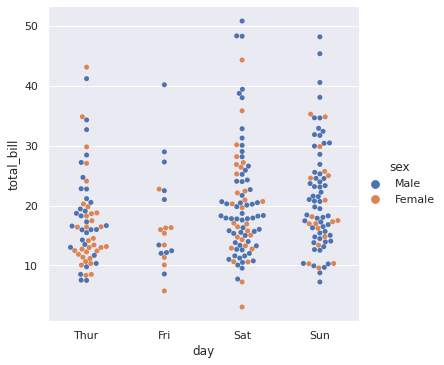

In [ ]:
p= sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

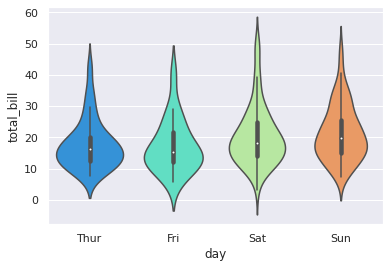

In [ ]:
p = sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

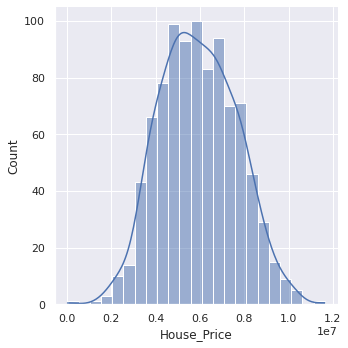

In [ ]:
col = 'House_Price'
plot = sns.displot(data=price2, x=col, kde=True)

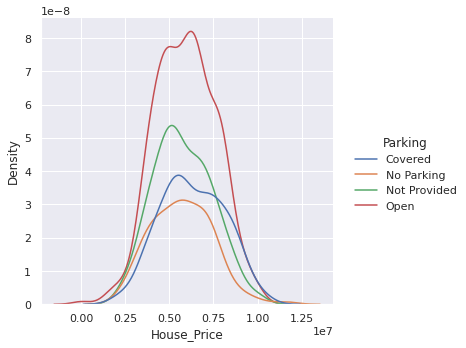

In [ ]:
plot = sns.displot(data=price2, x=col, hue='Parking', kind="kde")

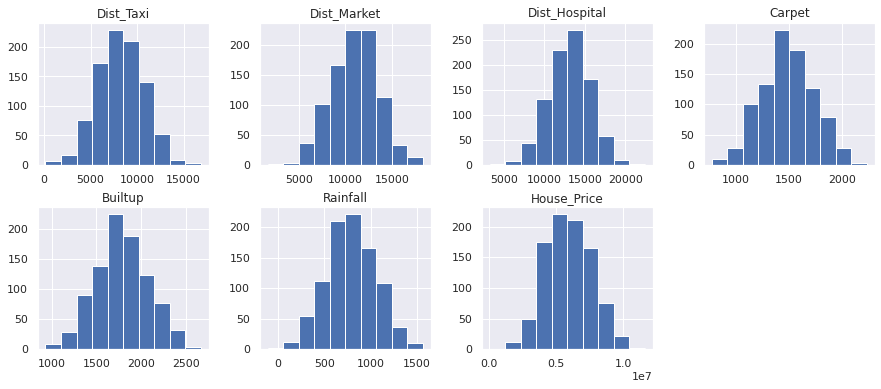

In [ ]:
numerical = price2.select_dtypes(include = ['int64','float64']).columns

price2[numerical].hist(figsize=(15, 6), layout=(2, 4));

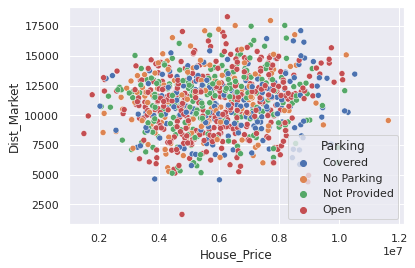

In [ ]:
p = sns.scatterplot(x=price2['House_Price'], y=price2['Dist_Market'], hue = price2['Parking'])

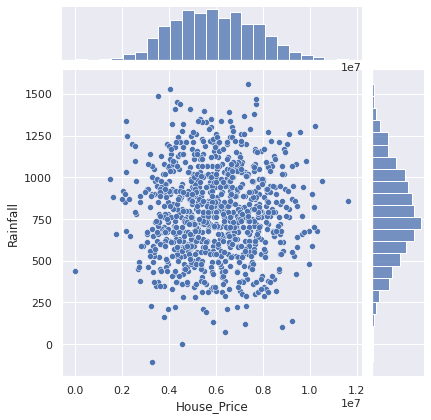

In [ ]:
p = sns.jointplot(x=price2['House_Price'], y=price2['Rainfall'])

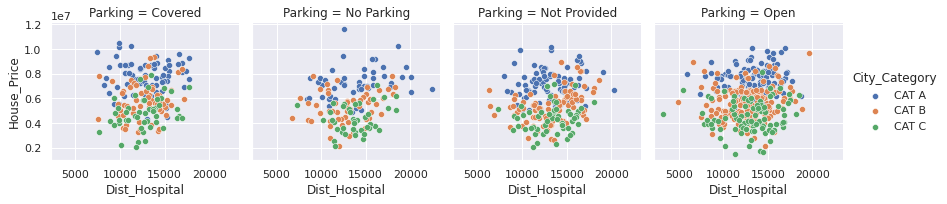

In [ ]:
cond_plot = sns.FacetGrid(data=price2, col='Parking', hue='City_Category')#, hue_order=["Yes", "No"]
p = cond_plot.map(sns.scatterplot, 'Dist_Hospital', 'House_Price').add_legend()

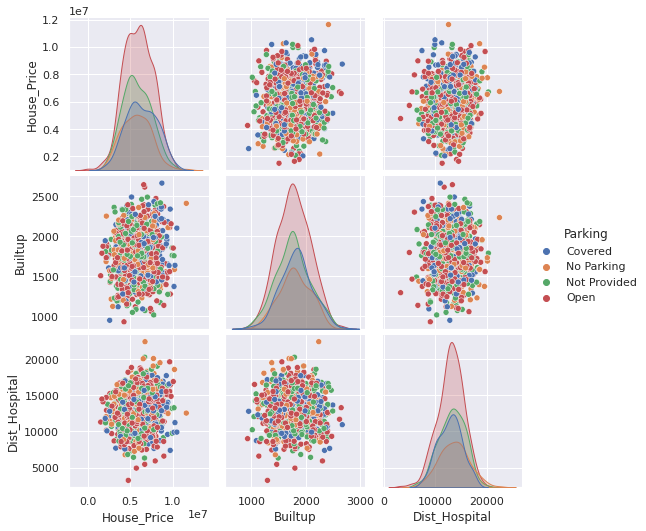

In [ ]:
# Coba kita perhatikan sebagiannya saja dulu dan coba kelompokkan berdasarkan "Parking"
p = sns.pairplot(price2[['House_Price','Builtup','Dist_Hospital','Parking']], hue="Parking")
# Ada pola menarik?

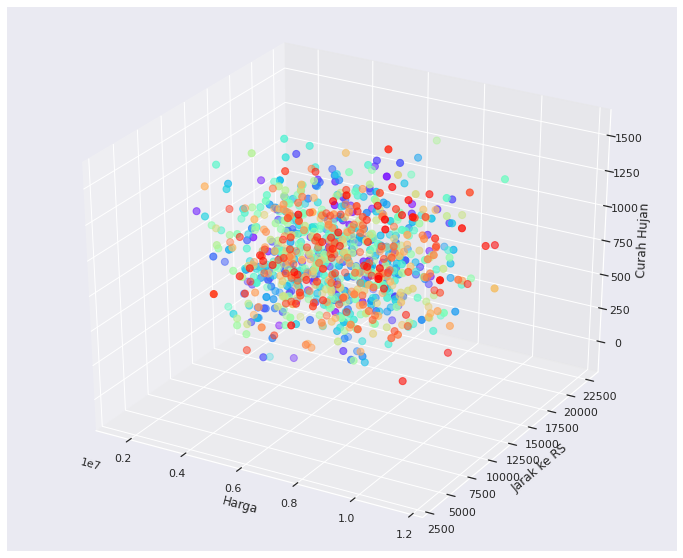

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
x = price2['House_Price']
y = price2['Dist_Hospital']
z = price2['Rainfall']
warna = cm.rainbow(np.linspace(0, 1, len(y)))

ax.scatter(x, y, z, s=50, c=warna, marker='o')
ax.set_xlabel('Harga')
ax.set_ylabel('Jarak ke RS')
ax.set_zlabel('Curah Hujan')
plt.show()

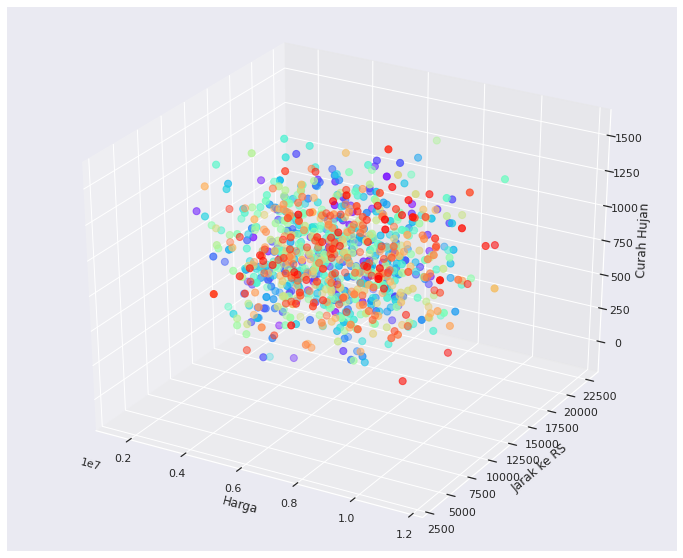

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
x = price2['House_Price']
y = price2['Dist_Hospital']
z = price2['Rainfall']
warna = cm.rainbow(np.linspace(0, 1, len(y)))

ax.scatter(x, y, z, s=50, c=warna, marker='o')
ax.set_xlabel('Harga')
ax.set_ylabel('Jarak ke RS')
ax.set_zlabel('Curah Hujan')
plt.show()

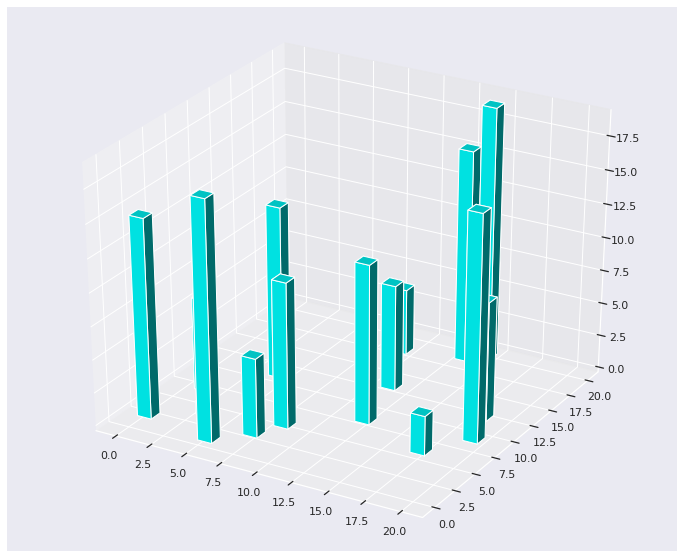

In [ ]:
import random

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection="3d")

num_bars = 15
x_pos = random.sample(range(20), num_bars)
y_pos = random.sample(range(20), num_bars)
z_pos = [0] * num_bars

x_size = np.ones(num_bars)
y_size = np.ones(num_bars)
z_size = random.sample(range(20), num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')
plt.show()

In [ ]:
price2.corr()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
Dist_Taxi,1.000000,0.449838,0.796853,0.010547,0.006286,0.020506,0.109612
Dist_Market,0.449838,1.000000,0.620136,-0.018603,-0.020581,0.069419,0.118755
Dist_Hospital,0.796853,0.620136,1.000000,0.011125,0.008617,0.050748,0.130522
Carpet,0.010547,-0.018603,0.011125,1.000000,0.998871,-0.045308,0.102092
Builtup,0.006286,-0.020581,0.008617,0.998871,1.000000,-0.042104,0.094550
Rainfall,0.020506,0.069419,0.050748,-0.045308,-0.042104,1.000000,0.013430
House_Price,0.109612,0.118755,0.130522,0.102092,0.094550,0.013430,1.000000


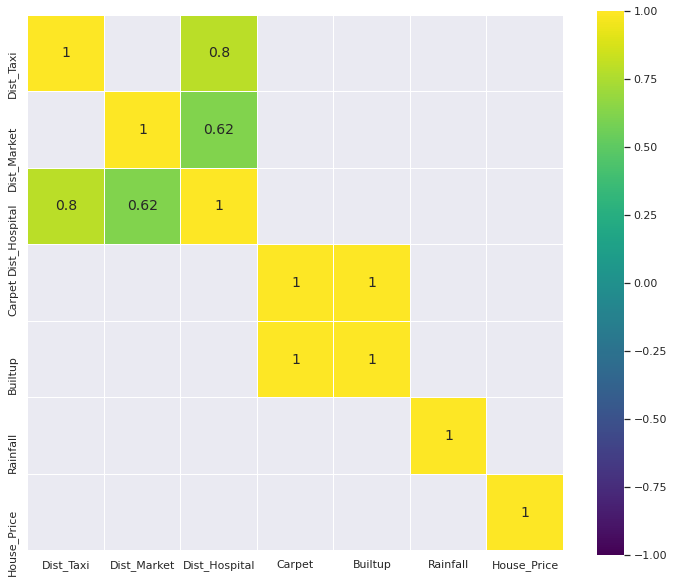

In [ ]:
# HeatMap untuk menyelidiki korelasi
corr2 = price2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

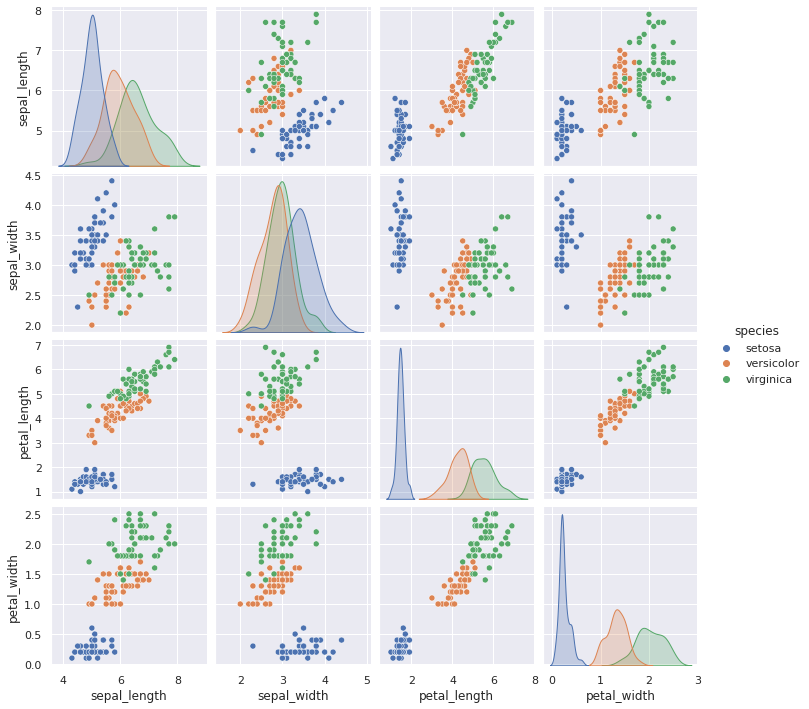

In [ ]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")

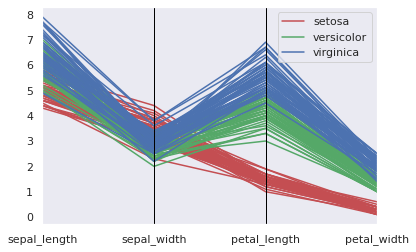

In [ ]:
pd.plotting.parallel_coordinates(iris, 'species', color=('r', 'g', 'b'))
plt.show()

In [ ]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
fmri.sample(10)

,subject,timepoint,event,region,signal
968,s4,0,cue,frontal,-0.039116
556,s8,4,cue,parietal,0.031201
20,s8,17,stim,parietal,-0.076287
853,s1,15,cue,parietal,0.003238
123,s3,10,stim,parietal,0.089231
1049,s10,8,cue,frontal,-0.052505
193,s3,5,stim,parietal,0.199188
604,s0,6,cue,frontal,0.050776
1023,s6,9,cue,frontal,-0.070898
609,s9,5,cue,frontal,0.047048


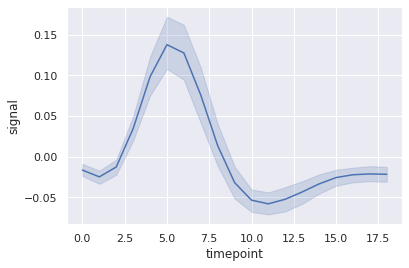

In [ ]:
# Plot the responses for different events and regions
plot = sns.lineplot(x="timepoint", y="signal", data=fmri)

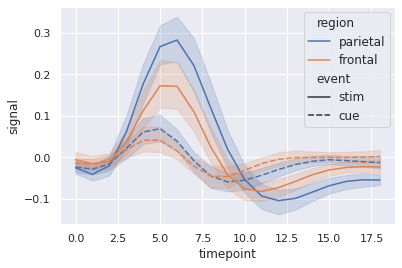

In [ ]:
plot = sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

In [ ]:
def generateBaseMap(default_location=[-0.789275, 113.921], default_zoom_start=5):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [ ]:
# Load Data
try:
    # Running Locally, yakinkan module folium sudah terinstall
    df_loc = pd.read_csv('data/df_loc.csv')
except:
    # Running in Google Colab, yakinkan folder "data" sudah ada
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/df_loc.csv
    df_loc = pd.read_csv('data/df_loc.csv')
    !pip install folium

--2021-04-12 17:05:12--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/df_loc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275702 (269K) [text/plain]
Saving to: ‘data/df_loc.csv’

df_loc.csv          100%[===================>] 269.24K  --.-KB/s    in 0.04s   

2021-04-12 17:05:12 (6.63 MB/s) - ‘data/df_loc.csv’ saved [275702/275702]



In [ ]:
df_loc.head()

,lat,lon,count
0,-6.87602,107.620,1
1,-7.79558,110.369,1
2,-6.87848,107.426,1
3,-6.12889,106.180,1
4,-6.20876,106.846,1


In [ ]:
import folium
from folium.plugins import HeatMap

base_map = generateBaseMap()
HeatMap(data=df_loc[['lat', 'lon', 'count']].groupby(['lat', 'lon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

# Latihan Studi Kasus: Data Tips Restaurant

Sebuah dataset dari suatu Restaurant memuat variabel-variabel berikut:
*	total_bill: Total bill (cost of the meal), including tax, in US dollars
*	tip: Tip (gratuity) in US dollars
*	sex: Sex of person paying for the meal (0=male, 1=female)
*	smoker: Smoker in party? (0=No, 1=Yes)
*	day: 3=Thur, 4=Fri, 5=Sat, 6=Sun
*	time: 0=Day, 1=Night
*	size: Size of the party

https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

In [ ]:
# Loading Contoh Data studi kasus pertama di atas
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.head()

baris =  244 , Kolom =  7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# TUGAS 1

Sebelum remove outlier atas

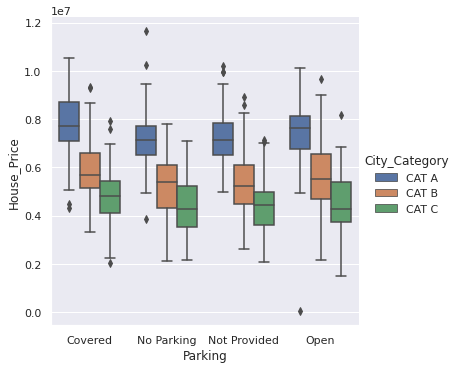

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

Setelah remove outlier atas

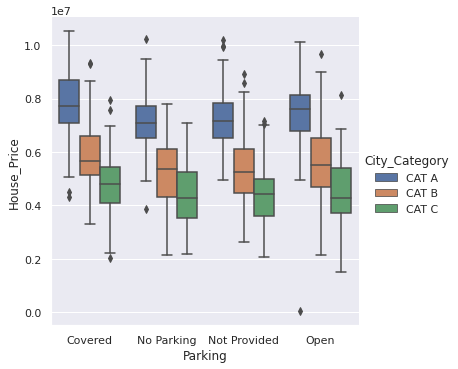

In [ ]:
q1 = price2["House_Price"].quantile(0.25)
q3 = price2["House_Price"].quantile(0.75)
iqr = q3 - q1
outliers = (price2["House_Price"])>(q3 + 1.5*iqr)
price3=price2.copy()
price3.loc[outliers]=np.nan
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price3)

# TUGAS 2

Sebelum remove outlier bawah

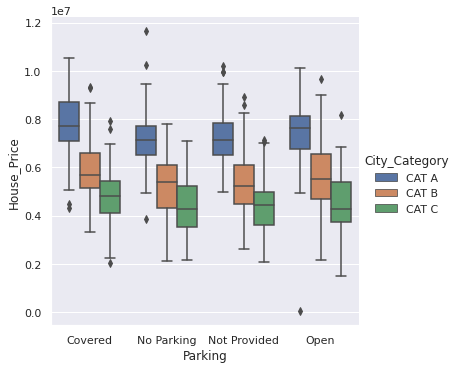

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

Setelah remove outlier bawah

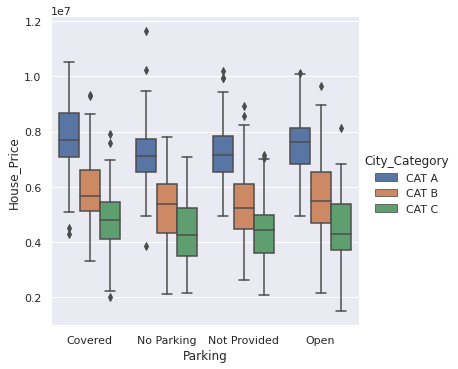

In [ ]:
q1 = price2["House_Price"].quantile(0.25)
q3 = price2["House_Price"].quantile(0.75)
iqr = q3 - q1
outliers = (price2["House_Price"])<(q1 - 1.5*iqr)
price4=price2.copy()
price4.loc[outliers]=np.nan
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price4)

# TUGAS 3

#### 1. Adakah tipe variabel yang kurang tepat di data tersebut?



In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.dtypes

baris =  244 , Kolom =  7


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.info()

baris =  244 , Kolom =  7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


- Pada data tersebut, seharusnya berisi tipe category saja. Namun, berdasarkan visualisasi di atas, pada data tersebut juga berisi tipe variabel yang kurang tepat yaitu tipe object (float, integer).

#### 2. Apakah data numeriknya cenderung berdistribusi normal?



baris =  244 , Kolom =  7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff42e3d0510>,
      dtype=object)

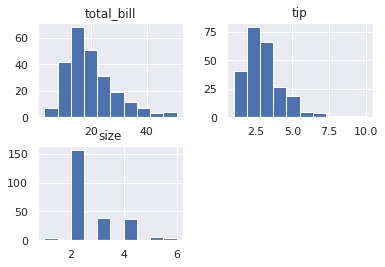

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.hist()

- Berdasarkan histogram, data numeriknya yakni data total bill, tip, dan size, cenderung tidak berdistribusi normal, karena data mean, modus, dan median tidak berada di titik yang sama sehingga kurvanya tidak simetris.

#### 3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?

In [ ]:
# Loading Contoh Data studi kasus pertama di atas
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.head()

baris =  244 , Kolom =  7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
49,18.04,3.0,Male,No,Sun,Dinner,2


In [ ]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
# Merubah tipe data "jika" tidak tepat, contoh:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
#mengecek apakah ada duplikat data?
print(tips.shape)
tips.duplicated().sum()

(244, 7)


1

In [ ]:
#menghapus entri yang memiliki data duplikat
tips.drop_duplicates(inplace=True)
print(tips.duplicated().sum()) # no more duplicates
print(tips.shape) # re-check by printing data size

0
(243, 7)


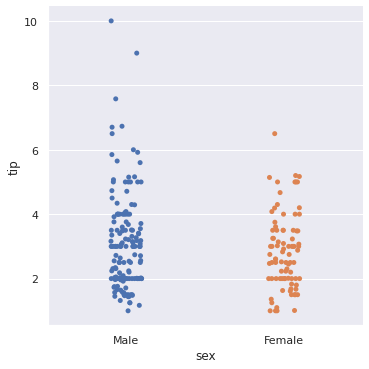

In [ ]:
p= sns.catplot(x="sex", y="tip", data=tips)
# Apa yang bisa dilihat dari hasil ini?

Dari grafik-grafik di atas, dapat diperoleh informasi :
- Terdapat duplikasi data pada baris 244 kolom 7 sehingga harus dihapus.
- Terdapat Outlier data juga pada data yaitu customer male yang memberi tips lebih dari 8 USD serta customer female yang memberi tips lebih dari 6 USD.

#### 4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

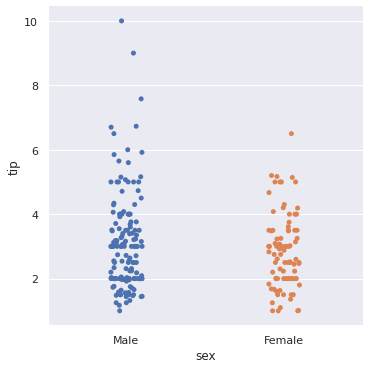

In [ ]:
p= sns.catplot(x="sex", y="tip", data=tips)
# Apa yang bisa dilihat dari hasil ini?

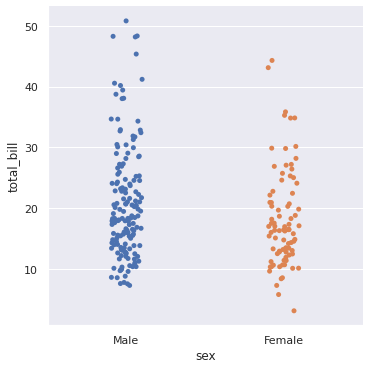

In [ ]:
p= sns.catplot(x="sex", y="total_bill", data=tips)
# Apa yang bisa dilihat dari hasil ini?

Berdasarkan scatter plot tersebut terlihat bahwa pelanggan pria lebih banyak dari pelanggan wanita. Namun, masih proposional dan (balance). Dari segi, total bill dan tip yang mereka keluarga juga masih tergolong proporsional (balance)

#### 5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?

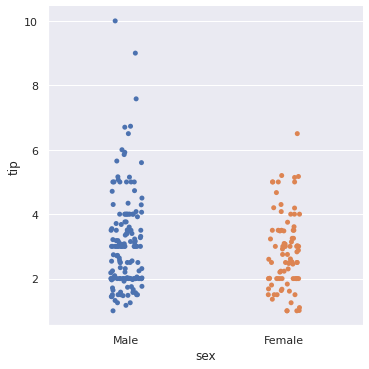

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
tips = sns.load_dataset('tips')
p= sns.catplot(x="sex", y="tip", data=tips)

Menurut visualisasi yang diberikan, customer berjenis kelamin laki-laki memiliki kecenderungan untuk memberikan tips yang lebih besar dibandingkan wanita. Hal ini terlihat dari

#### 6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

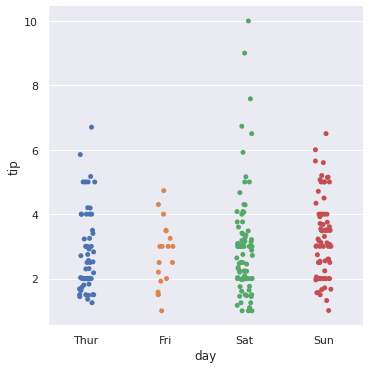

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
tips = sns.load_dataset('tips')
p= sns.catplot(x="day", y="tip", data=tips)

Menurut visualisasi di atas, pada hari weekend yaitu pada hari sabtu dan minggu, customer memiliki kecenderungan untuk memberikan tip

#### 7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?


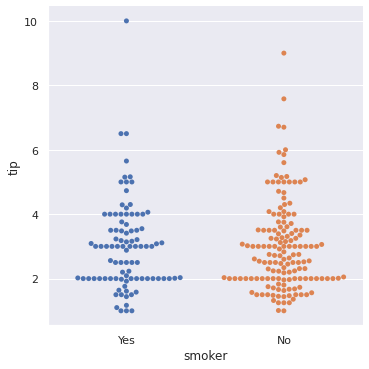

In [ ]:
p= sns.catplot(x="smoker", y="tip", kind="swarm", data=tips)

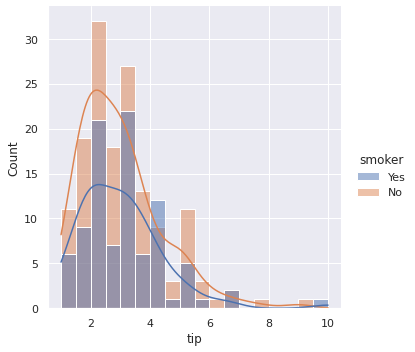

In [ ]:
col = 'tip'
plot = sns.displot(data=tips, x=col, hue='smoker', kde=True)


Dari dua grafik di atas terlihat bahwa yang memberi tips lebih banyak adalah orang yang tidak merokok

####8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?

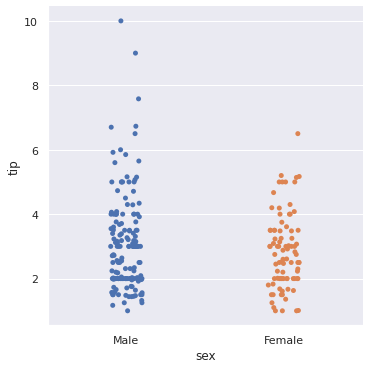

In [ ]:
p= sns.catplot(x="sex", y="tip", data=tips)

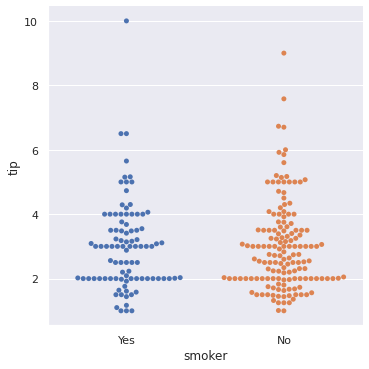

In [ ]:
p= sns.catplot(x="smoker", y="tip", kind="swarm", data=tips)

Dari data grafik di atas belum terlihat adanya pengaruh hari, sebab tidak dimasukkan variabel hari

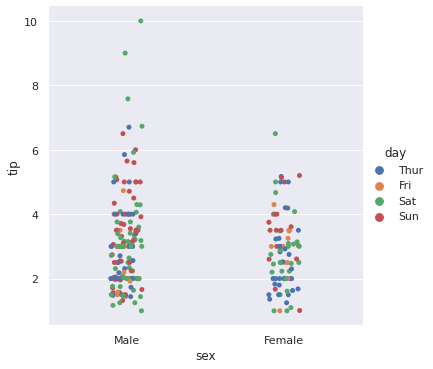

In [ ]:
p= sns.catplot(x="sex", y="tip", hue ="day", data=tips)

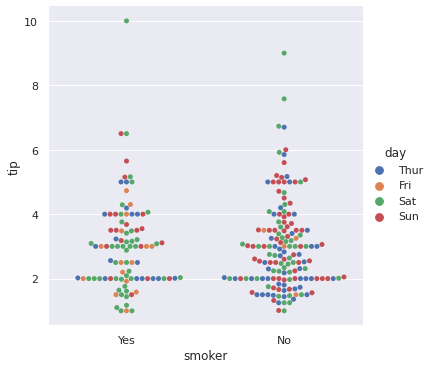

In [ ]:
p= sns.catplot(x="smoker", y="tip", hue="day", kind="swarm", data=tips)

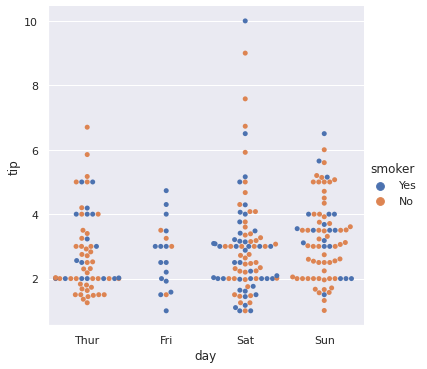

In [ ]:
p= sns.catplot(x="day", y="tip", hue="smoker", kind="swarm", data=tips)

Setelah dimasukkan variabel hari, dapat dilihat bahwa pada hari sabtu orang-orang cenderung memberikan tips lebih besar dibandingkan hari-hari lainnya

#### 9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)

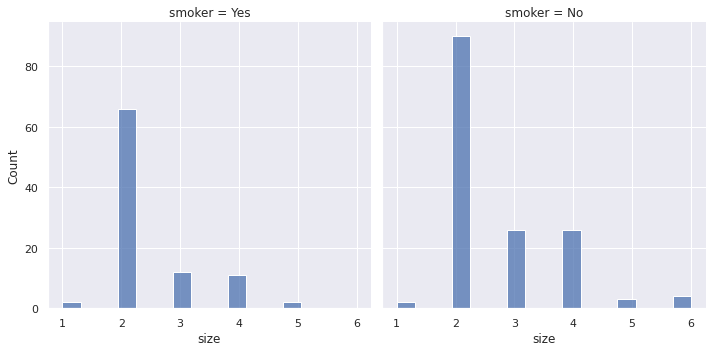

In [ ]:
p=sns.displot(data=tips, x="size", col="smoker")

a. Jika dilihat dari visualisasi di atas, baik yang merokok ataupun tidak merokok, pengunjung paling banyak yang datang berdua.

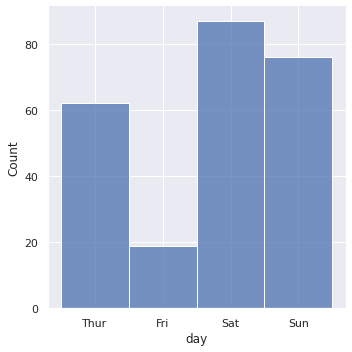

In [ ]:
p=sns.displot(data=tips, x="day")

b. Restoran paling sibuk di weekend khususnya Sabtu, dan paling tidak sibuk di hari Jumat.


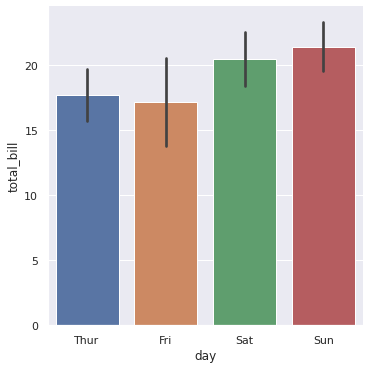

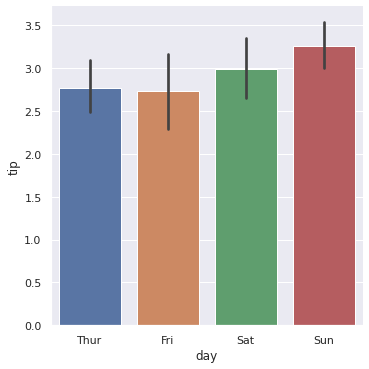

In [ ]:
p=sns.catplot(data=tips, kind="bar", x="day", y="total_bill")
p1=sns.catplot(data=tips, kind="bar", x="day", y="tip")

c. Walaupun jumlah pengunjung paling banyak hari Sabtu, tetapi **rata**-rata total bill dan tips tertinggi terjadi pada hari Minggu.

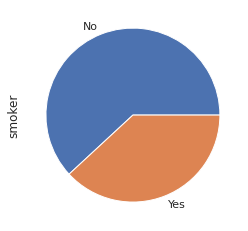

In [ ]:
p = tips.smoker.value_counts().plot(kind="pie")

d. Pengunjung yang merokok lebih sedikit daripada yang tidak merokok, walau tidak terlalu signifikan.

#### 10. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant?

a. Karena jika dilihat dari visualisasi di atas, baik yang merokok ataupun tidak merokok, pengunjung paling banyak yang datang berdua, maka peletakan meja yang paling banyak untuk pengunjung yang datang berdua.

b. Karena restoran paling sibuk di weekend khususnya Sabtu, dan paling tidak sibuk di hari Jumat, maka jam kerja dan jumlah pegawai dapat dipusatkan ke hari Sabtu dan Minggu, dan dikurangi di hari Jumat.

c. Karena pengunjung lebih banyak yang datang untuk makan malam, maka jam kerja dan jumlah pegawai dapat diperbanyak pada waktu jam makan malam.

d. Karena pengunjung yang merokok lebih sedikit daripada yang tidak merokok, maka jumlah meja yang untuk non-perokok lebih banyak daripada yang perokok.